<img src="BREAST_CANCER_2.png" style="width:80%; clear:both; margin-bottom:-20px" align=centre>
<br style="clear:both;"/>

# Construyendo un modelo simple de aprendizaje automático sobre datos de cáncer de mama

By Roberto Mansilla - LinkedIn Profile: [web](https://www.linkedin.com/in/roberto-mansilla-lobos/)

# Cáncer de mama
----------
En el 2016, según estimaciones de la Agencia para la investigación del Cancer (IARC), un 16% de las muertes mundiales fueron debido al cancer. Específicamente, según el World Cancer Research Fundation ([web](https://www.wcrf.org/dietandcancer/cancer-trends/breast-cancer-statistics)), el cancer de mama a nivel mundial es el segundo cancer más frecuente y el primero en el caso de las mujeres. Sólo en el 2018 se presentaron alrededor de 2 millones de nuevos casos en todo el mundo. Sin duda uno de los problemas de salúd mundial más importantes. 

Dentro de este contexto, un diagnóstico temprano puede mejorar significativamente el pronóstico y el tratamiento adecuado para cada paciente. Una buena precisión en la clasificación de los tumores benignos/malignos puede evitar tratamientos innecesarios y mejorar la utilización de recursos. Técnicas como el Aprendizaje Automático (Machine Learning) han sido utilizados para crear modelos que puedan ayudar a la clasificación de enfermedades a partir de datos históricos.  

----------

# Situación en Chile 
<img src="BREAST_CANCER_1.png" style="width:20%; clear:both; margin-bottom:5px" align=left>
<br style="clear:both;"/>


En Chile, la situación no es muy diferente. El cancer de mama es tambien la primera causa de muerte entre las mujeres chilenas con más de 1.300 decesos al año (Minsal) y que en el caso de las mujeres se refleja en que diariamente mueren alrededor de 3 mujeres por esta enfermedad. Diferentes esfuerzos se han realizado por obtener una detección temprana de la enfermedad, ya que esto mejora significativamente la sobrevida de los pacientes. Del 2017 al 2018, las mamografías por Fonasa aumentaron un 12% llegando a un total de 14.098, logrando diagnosticar un total de 5.528 personas con cancer de mama, de las cuales 1.367 eran mujeres sobre 60 años.    

## 1. Información de la base de datos

Para crear nuestro modelo que nos ayude a clasificar las muestras como benignos o malignos utilizaremos datos públicos creado por el Dr. William H. Wolberg, médico del hospital de la Universidad de Wisconsin en Madison, Wisconsin, Estados Unidos. La base de datos la podemos descargar del siguiente link [web](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29).

Cada fila de la base de datos representa una muestra de tejido y cada columna, a excepción de la primera y la última, representa una variable o característica de cada muestra. La primera columna nos indica el ID de cada muestra y la última denota la característica de resultado, es decir, si la muestra fue beninga o maligna, representadas por los valores 2 y 4 respectivamente. La variables (features) de la base de datos se describen a continuación:

### Información de las variables: 
- **Sample code number:** id de la muestra e.g. 1000025
- **Clump Thickness:** 1 - 10 
- **Uniformity of Cell Size:** 1 - 10 
- **Uniformity of Cell Shape:** 1 - 10 
- **Marginal Adhesion:** 1 - 10 
- **Single Epithelial Cell Size:** 1 - 10 
- **Bare Nuclei:** 1 - 10 
- **Bland Chromatin:** 1 - 10 
- **Normal Nucleoli:** 1 - 10 
- **Mitoses:** 1 - 10 
- **Class:** (2: benignos, 4: malignos)

Mayor información sobre los datos en el siguiente link [web](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29).

## 2. Instalar e Importar librerías necesarias 

In [1]:
#-- Instalar las librerias a utilizar
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install matplotlib
! pip install sklearn
! pip install Plotly
! pip install cufflinks

You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
#-- Manipulación de datos
import pandas as pd
import numpy as np

#-- Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks as cf
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool

#-- Aprendizaje automático 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#-- Evaluación de los modelos 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [3]:
#-- Formatos para una mejor visualización
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sns.set(style="ticks", color_codes=True)

In [4]:
#-- Estableciendo la conexión API de Plotly
tls.set_credentials_file(username='rmansilla', api_key='1Rp4uRujNLFPwdNWuKhW')

## 2. Funciones creadas 

In [5]:
#-- Funcion para desplegar un gráfico de torta
def pie_chart(df,col, title):
    """
    Parametros:
    ----------
    df : pandas dataframe
    col (string): nombre de la columna del dataframe 
    title (string): título del gráfico 
    
    Resultado:
    -------
    Despliega un gráfico de torta con las etiquetas y la proporción 
    (%) de los datos
    """
    counts = df[col].value_counts()
    counts.plot(kind='pie',autopct='%.0f%%',fontsize=20, figsize=(6, 6))
    plt.title(title)
    plt.show() 

#-- Función para desplegar un gráfico de barras 
def bar_plot_b(df,GB_col,col,agg,title):
    """
    Parametros:
    ----------
    df = dataframe 
    GB_col (string) = nombre de la columna de la cual se quiere agrupar
    col (string) = nombre de la columna de la cual se quiere calcular
    agg (string) = name of the aggregation you want to apply
    title (string) = título del gráfico

    Resultado:
    -------
    Despliega un gráfico de barras interactivo 
    """
    #-- Creamos un dataframe
    df_plot = pd.DataFrame(df.groupby(df[GB_col])[col].agg(agg))
    x_item = list(df_plot.index)
    x_item = [str(i) for i in x_item]
    y_item = list(df_plot[col])
    
    #-- output a un archivo estático HTML 
    output_file("bar_categorical.html")
    
    #-- Especificar la fuente y el color
    source = ColumnDataSource(data=dict(x_item=x_item, y_item=y_item, 
                                        color=Spectral6))
    
    #-- Crear una figura
    plot = figure(x_range=x_item ,plot_width=500, plot_height=400,
                  title = title, x_axis_label = GB_col)
    
    #-- Crear un gráfico de barras
    plot.vbar(x='x_item', top='y_item', width=0.5, color='color',
              source=source)
    
    #-- Hover tool con modo vline 
    hover = HoverTool(tooltips=[(title[0:20], '@y_item')], mode='vline')

    plot.add_tools(hover)
    
    #-- Mostrar los resultados 
    output_notebook()
    show(plot, notebook_handle=True )

## 3. Importar y preparar los datos

In [6]:
#-- Importar la base de datos 
df = pd.read_csv('breast-cancer-wisconsin.data.csv',header=None)

#-- Definir el nombre de las columnas 
df.columns = ['sample_number','clump_thickness','uniformity_cell_size','uniformity_cell_shape'
              ,'adhesion','cell_size','bare_nuclei','bland_chromatin','normal_nucleoli',
              'mitoses','class']

#-- Desplegar las primeras 5 filas 
df.head()

,sample_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
#-- Información general 
print(df.info())

#-- Número de filas y columnas 
print('\n')
print("Numbero de muestras:", df.shape[0])
print("Numbero de variables:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_number            699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_size     699 non-null int64
uniformity_cell_shape    699 non-null int64
adhesion                 699 non-null int64
cell_size                699 non-null int64
bare_nuclei              699 non-null object
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
class                    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None


Numbero de muestras: 699
Numbero de variables: 11


##### Podemos notar que la base de datos cuenta con 11 columnas, 10 de ellas son numéricas y 1 categórica. Tiene un total de 699 filas de las cuales ninguna tiene valores nulos.

Los valores nulos no solo son espacios en blancos, sino que tambien celdas que contengan simbolos como: # o ?. 



In [8]:
#-- Verifacar si existen celdas con el simbolo '?'
print(df[df == '?'].count())

#-- Verifacar si existen celdas con el simbolo '#'
print(df[df == '#'].count())

sample_number             0
clump_thickness           0
uniformity_cell_size      0
uniformity_cell_shape     0
adhesion                  0
cell_size                 0
bare_nuclei              16
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64
sample_number            0
clump_thickness          0
uniformity_cell_size     0
uniformity_cell_shape    0
adhesion                 0
cell_size                0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
dtype: int64


Aplicamos el médoto 'ffill' que llenará hacia adelante cualquier valores nulo con valores del último elemento no nulo de la columna correspondiente

In [9]:
#-- Reemplazar el simbolo '?' por NaN 
df[df=='?']=np.NaN

#-- Aplicamos el médoto 'ffill' 
df = df.fillna(method='ffill')

In [10]:
#-- Convirtiendo la columna 'bare_nuclei' a numérica (int)
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])
df['bare_nuclei'] = df['bare_nuclei'].astype(int)

In [11]:
#-- Elminar la columna sample_number 
df = df.drop(['sample_number'], axis = 1)

In [12]:
#-- Verificar que todo esté en orden
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness          699 non-null int64
uniformity_cell_size     699 non-null int64
uniformity_cell_shape    699 non-null int64
adhesion                 699 non-null int64
cell_size                699 non-null int64
bare_nuclei              699 non-null int64
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
class                    699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


## 3. Explorando los datos

#### Análisis univariable

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



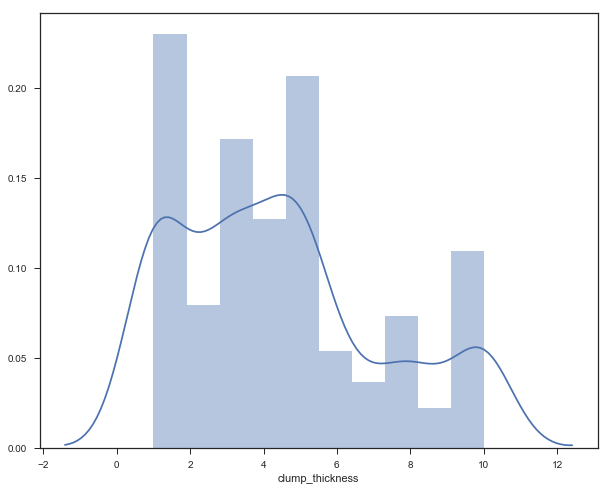

In [13]:
sns.distplot(df['clump_thickness'])

Podemos notar que la variable clump_thickness no cuenta con una distribución normal.

##### Verificamos visualmente que nuestra variable objetivo es binaria 

In [14]:
#-- Gráfico de barras 
bar_plot_b(df,'class','class','count','Cantidad de muestras por tipo')

/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('color', 6), ('x_item', 2), ('y_item', 2)



Loading BokehJS ...

Como sabemos que 2 corresponde a las muestras beningas y 4 a las malignas. Tenemos que 458 son muestras geningas y 241 son malignas

##### Proporción de la variable objetivo

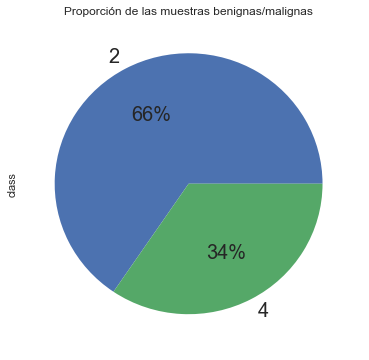

In [15]:
#-- Gráfico de torta
pie_chart(df,'class','Proporción de las muestras benignas/malignas')

Tenemos que un 66% de las muestras son benignas y un 34% son malignas.

##### Resumen estadístico

In [16]:
#-- Realizamos un resumen estadistico de los datos 
df.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Podemos notar que todas las variables se encuentran en la misma escala por lo que no es necesario standarizar los datos tambien podemos notar que no existen valores extremos, pero confirmaremos eso creando Box plots y detectar posibles outliers

#### Análisis multivariable 

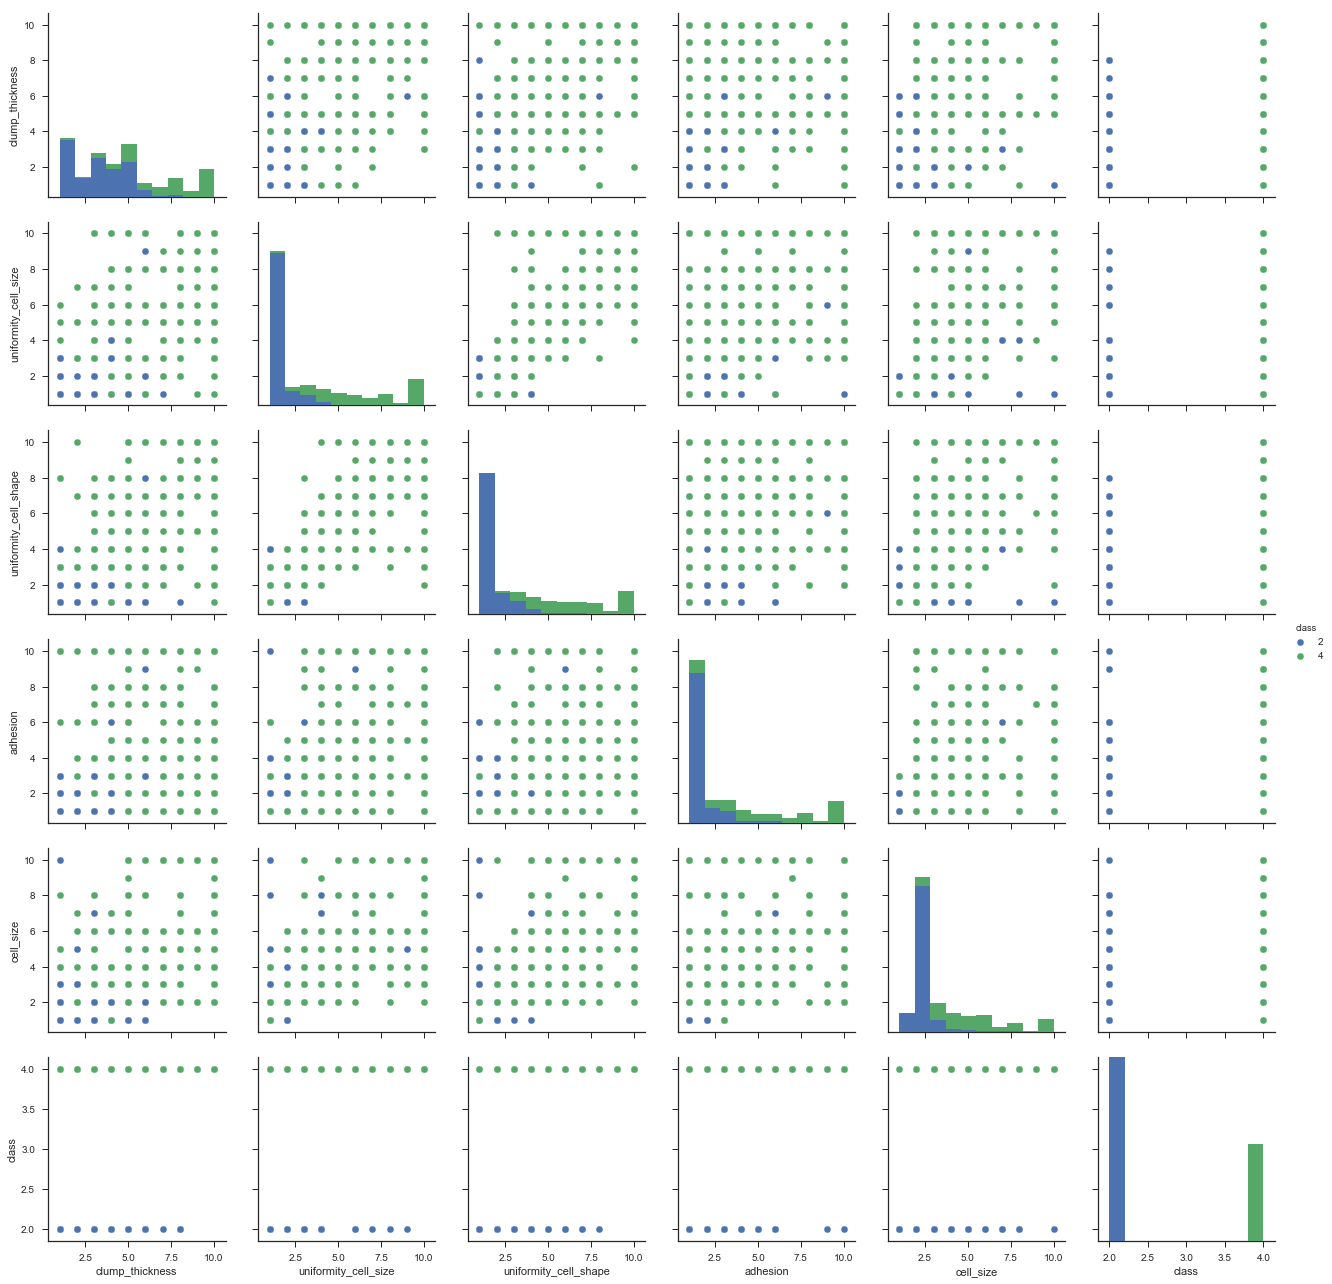

In [17]:
#-- Pairplot
df_select = df.drop(['bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'], axis = 1)

sns.pairplot(df_select, size= 3, aspect= 1, hue='class')

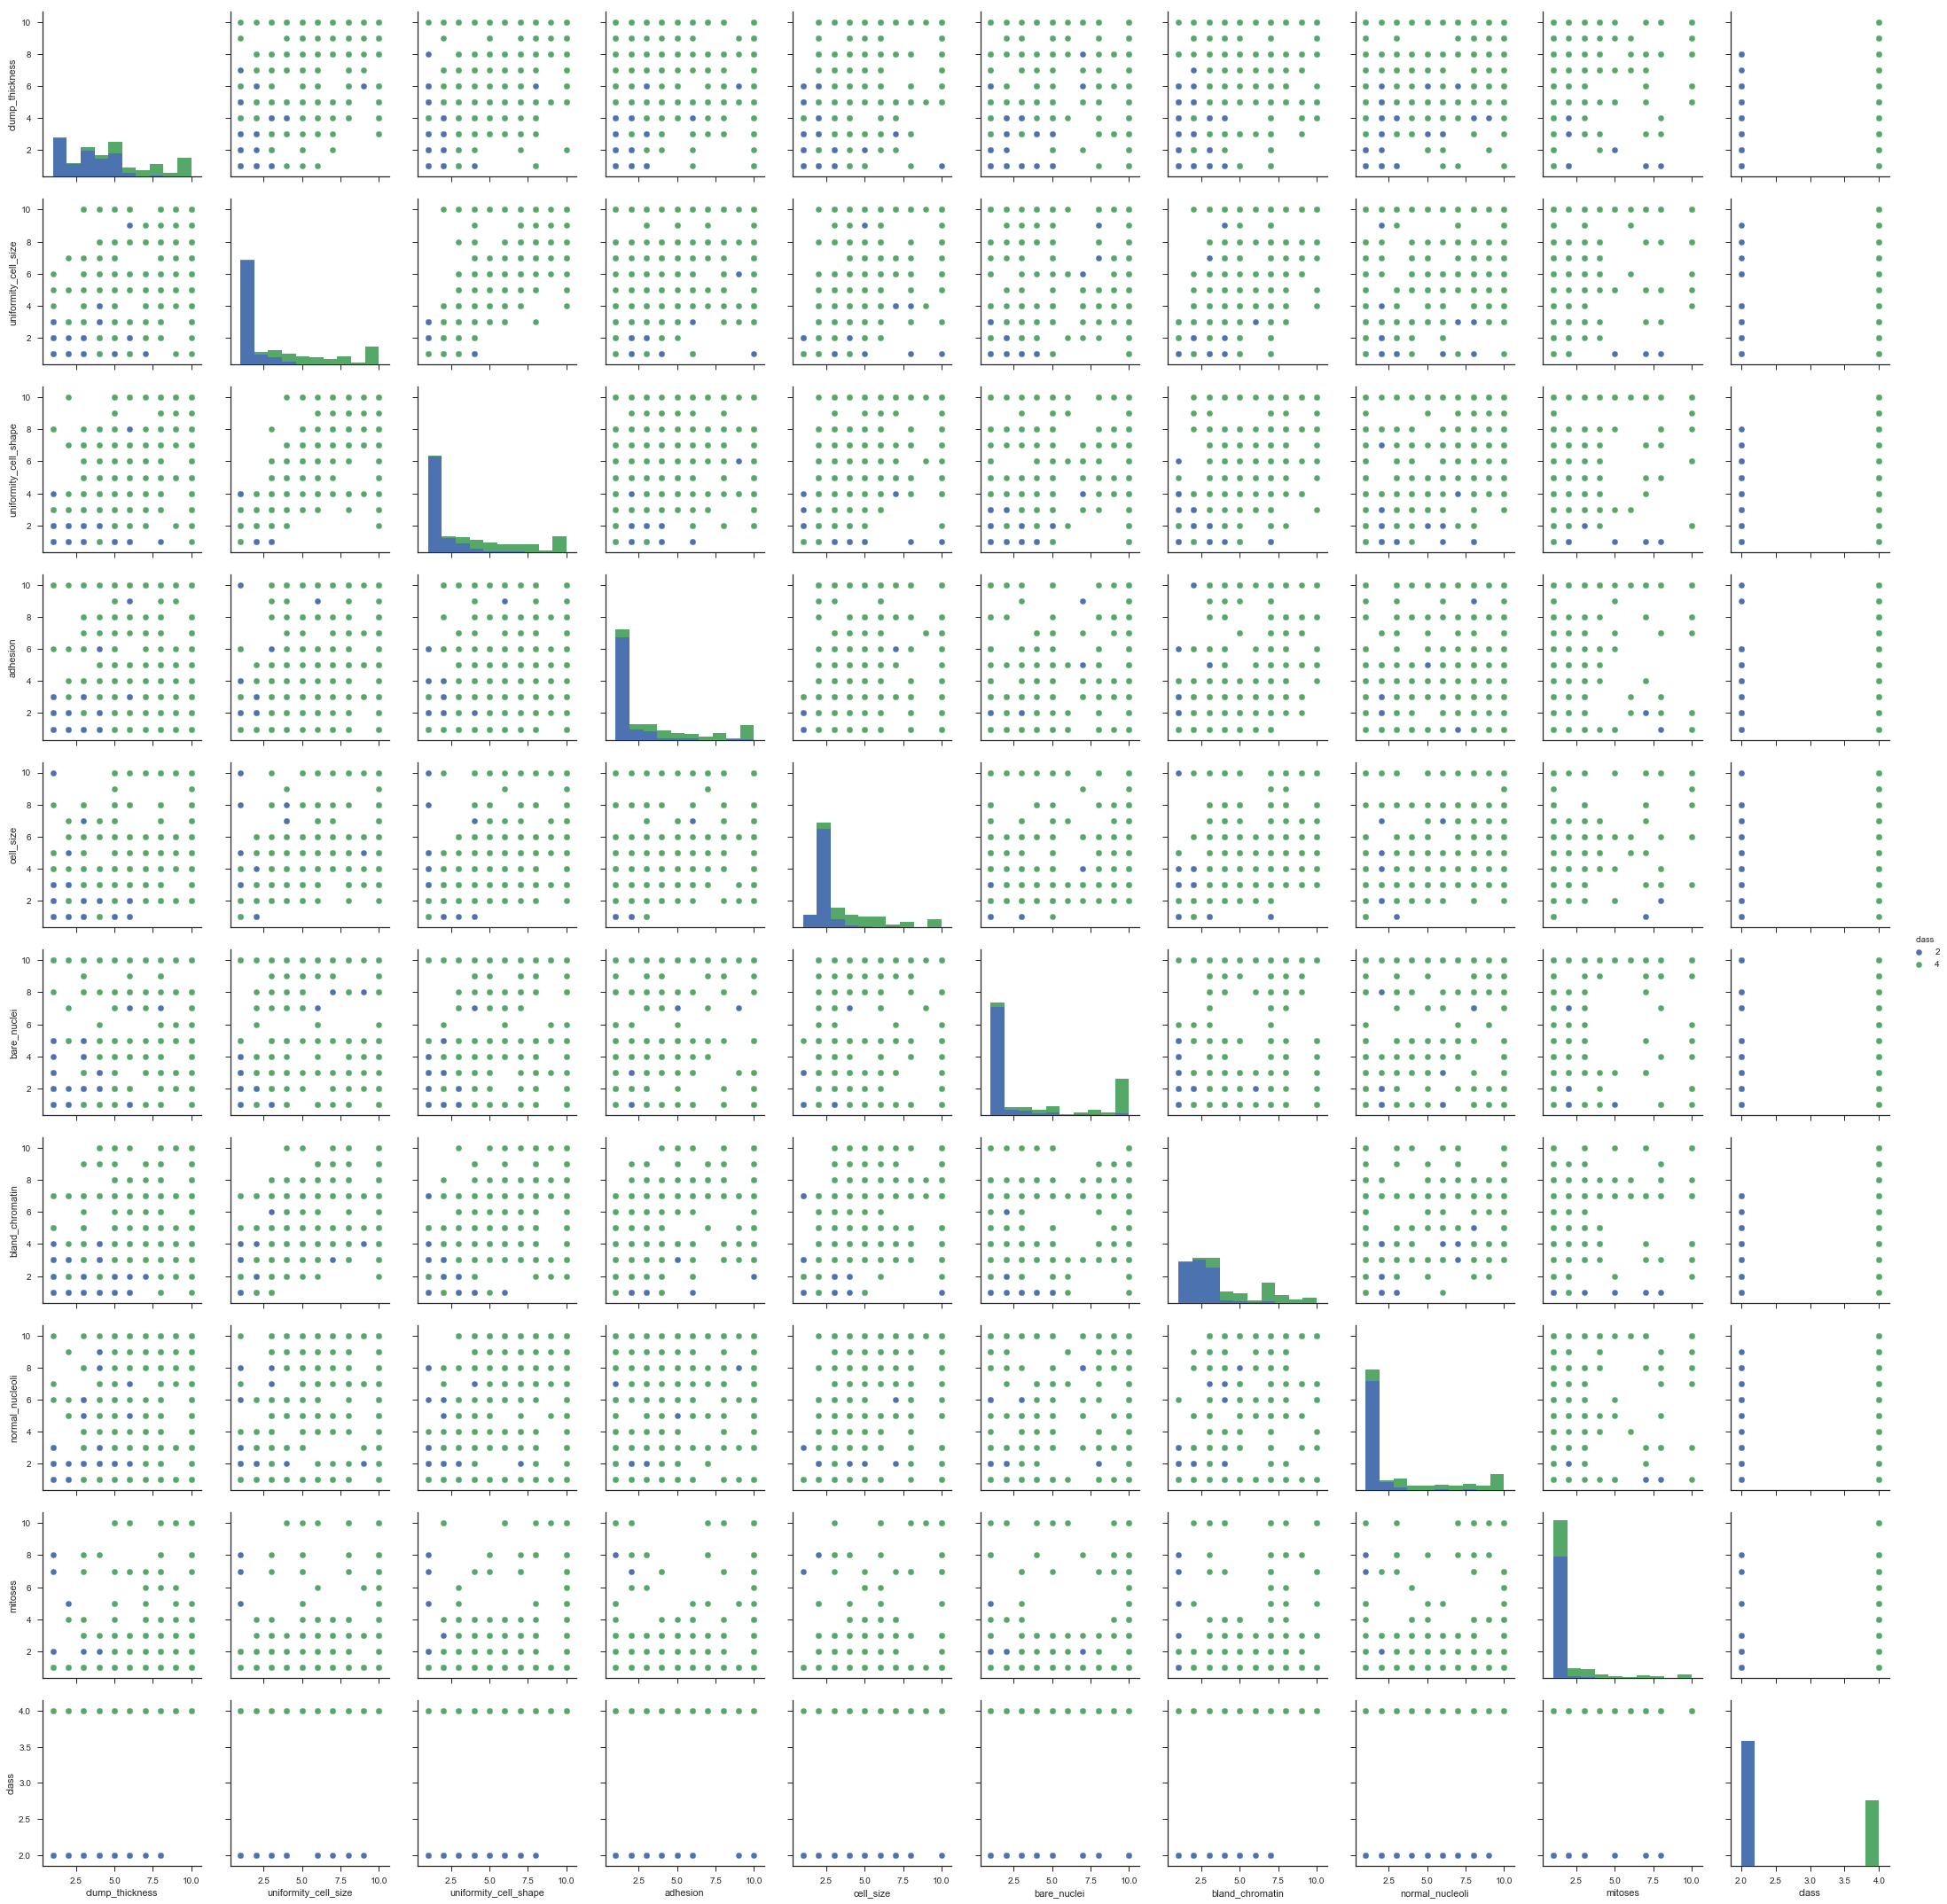

In [18]:
sns.pairplot(df, size= 3, aspect= 1, hue='class')

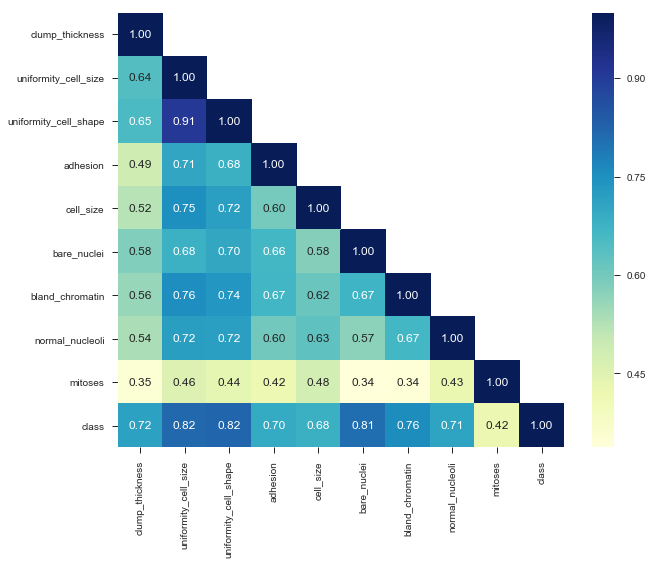

In [19]:
#-- Matriz de correlación
df_corr = df.corr()
mask = np.triu(df_corr, k=1)
sns.heatmap(df_corr, cmap= 'YlGnBu', annot=True, fmt=".2f", mask=mask, )

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. A primera vista se puede observa que la variable objetivo 'class' tiene una fuerte correlación con cada una de las variables predictoras, a excepción de la variable 'mitosis' con la cual existe una correlación leve. Con respecto a las variables predictoras, llama la atención la fuerte correlación entre las variables 'uniformity_cell_size' y 'uniformity_cell_size' que podría indicar multicolinealidad, es decir, que básicamente comparter la misma información.


#### Verificamos que existan datos suficientes para cada una de las variables predictoras y que no existan valores nulos

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness          699 non-null int64
uniformity_cell_size     699 non-null int64
uniformity_cell_shape    699 non-null int64
adhesion                 699 non-null int64
cell_size                699 non-null int64
bare_nuclei              699 non-null int64
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
class                    699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


Podemos notar que tenemos datos suficientes (699) en todas las variables predictoras y que no existen valores nulos que puedan afectar a los modelos 

##### Verificar que no existan valores extremos o outliers en las variables predictoras

In [21]:
#-- Dataframe con solo las variables predictoras
df_features =  df.drop(['class'], axis = 1)

#-- Creamos box-plot para verificar que no existan outilers
df_features.iplot(kind='box', filename='box-plots')

Como se pudo ver en el resumen estdístico, no existen outliers que puedan afectar a los modelos.

#### Verificamos que exista correlación entre las variables predictoras y la variable objetivo

In [22]:
#-- Creamos un matriz de pearson correlation entre la variable 'class' y todas las otras
corr_class = df.corr()['class']
display(corr_class)

#-- Podemos notar que existe una alta correlación con todas las variables

clump_thickness          0.716001
uniformity_cell_size     0.817904
uniformity_cell_shape    0.818934
adhesion                 0.696800
cell_size                0.682785
bare_nuclei              0.807394
bland_chromatin          0.756616
normal_nucleoli          0.712244
mitoses                  0.423170
class                    1.000000
Name: class, dtype: float64

## 4. Splitting the dataset

In [23]:
#-- Separando la variable objetivo 'class' con las variables predictoras
y = df['class'].values
X = df.drop('class', axis = 1).values 

In [24]:
#-- Diviendo los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#-- Desplegar el detalle de entrenamiento y testeo
print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

Predictor - Training :  (559, 9) Predictor - Testing :  (140, 9)


## 5. Configuramos y testeamos los modelos

##### Configuramos Logistic Regression

In [25]:
#-- Entrenamos el modelo
lr = LogisticRegression(random_state = 0)

lr.fit(X_train,y_train)

#-- Testeamos el modelo
lr_pred = lr.predict(X_test)

#-- Desplegamos los resultados del modelo
print('* Logistic Regression accuracy: ',accuracy_score(y_test, lr_pred))
print('\n')
print('* Matriz de Confusión:')
print(confusion_matrix(y_test, lr_pred))
print('\n')
print('* Informe de Clasificación :')
print(classification_report(y_test, lr_pred))

* Logistic Regression accuracy:  0.9714285714285714


* Matriz de Confusión:
[[83  2]
 [ 2 53]]


* Informe de Clasificación :
             precision    recall  f1-score   support

          2       0.98      0.98      0.98        85
          4       0.96      0.96      0.96        55

avg / total       0.97      0.97      0.97       140



In [26]:
from sklearn.model_selection import cross_val_score, KFold

folds = KFold(n_splits=10, shuffle=True, random_state=0)

print(cross_val_score(lr,X,y, scoring='accuracy',cv=folds).mean())


0.9642443064182196


##### Configuramos Decision Tree Classifier

In [27]:
#-- Entrenamos el modelo
dt = DecisionTreeClassifier(random_state = 0)

dt.fit(X_train,y_train)

#-- Testeamos el modelo
dt_pred = dt.predict(X_test)

#-- Desplegamos los resultados del modelo
print('* Decision Tree accuracy: ',accuracy_score(y_test, dt_pred))
print('\n')
print('* Matriz de Confusión:')
print(confusion_matrix(y_test, dt_pred))
print('\n')
print('* Informe de Clasificación :')
print(classification_report(y_test, dt_pred))

* Decision Tree accuracy:  0.9285714285714286


* Matriz de Confusión:
[[81  4]
 [ 6 49]]


* Informe de Clasificación :
             precision    recall  f1-score   support

          2       0.93      0.95      0.94        85
          4       0.92      0.89      0.91        55

avg / total       0.93      0.93      0.93       140



In [28]:
print(cross_val_score(dt,X,y, scoring='accuracy',cv=folds).mean())

0.9327329192546584


##### Configuramos Random Forest Classifier

In [29]:
#-- Entrenamos el modelo
rf = RandomForestClassifier(random_state = 0)

rf.fit(X_train,y_train)

#-- Testeamos el modelo
rf_pred = rf.predict(X_test)

#-- Desplegamos los resultados del modelo
print('* Random Forest accuracy: ',accuracy_score(y_test, rf_pred))
print('\n')
print('* Matriz de Confusión:')
print(confusion_matrix(y_test, rf_pred))
print('\n')
print('* Informe de Clasificación :')
print(classification_report(y_test, rf_pred))

* Random Forest accuracy:  0.9785714285714285


* Matriz de Confusión:
[[83  2]
 [ 1 54]]


* Informe de Clasificación :
             precision    recall  f1-score   support

          2       0.99      0.98      0.98        85
          4       0.96      0.98      0.97        55

avg / total       0.98      0.98      0.98       140



In [30]:
print(cross_val_score(rf,X,y, scoring='accuracy',cv=folds).mean())

0.9585507246376812


## 6. Predecimos nuevas muestras con el mejor modelo (Random Forest)

In [31]:
df.iloc[5,:]

clump_thickness           8
uniformity_cell_size     10
uniformity_cell_shape    10
adhesion                  8
cell_size                 7
bare_nuclei              10
bland_chromatin           9
normal_nucleoli           7
mitoses                   1
class                     4
Name: 5, dtype: int64

In [32]:
new_sample_1 = np.array([8,10,10,8,7,10,9,7,2]).reshape(1, -1)
new_sample_2 = np.array([2,1,3,6,3,10,4,2,10]).reshape(1, -1)
new_sample_1=rf.predict(new_sample_1) 
new_sample_2=rf.predict(new_sample_2) 
print("La predicción para la nueva muestra 1 es: ",new_sample_1[0])
print("La predicción para la nueva muestra 2 es: ",new_sample_2[0])


La predicción para la nueva muestra 1 es:  4
La predicción para la nueva muestra 2 es:  2


## 7. Conclusiones

Puede que el modelo Logistic Regression no performó tan bien como el modelo de Random Forest por que existe una alta correlación entre la mayoría de las variables predictoras y una de los supuesto de Logistic Regression es que las variables independientes no tenga una correlación fuerte. 